In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Resources/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
nyc = df[['neighbourhood_group', 'room_type', 'reviews_per_month', 'availability_365', 'price' ]]
nyc.head()

,neighbourhood_group,room_type,reviews_per_month,availability_365,price
0,Brooklyn,Private room,0.21,365,149
1,Manhattan,Entire home/apt,0.38,355,225
2,Manhattan,Private room,NaN,365,150
3,Brooklyn,Entire home/apt,4.64,194,89
4,Manhattan,Entire home/apt,0.10,0,80


In [5]:
# #Airbnb for less than $250 per night
nyc =nyc.loc[nyc["price"] <= 250]

In [6]:
# Replacing nan values with 0
nyc["reviews_per_month"] = nyc["reviews_per_month"].fillna(0)

In [7]:
# Converting categorical data using get_dummies
X = pd.get_dummies(nyc[['neighbourhood_group', 'room_type', 'reviews_per_month', 'availability_365']])
y = nyc['price'].values.reshape(-1, 1)
print(X.shape, y.shape)

(43687, 10) (43687, 1)


In [8]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [9]:
# Plotting the results 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

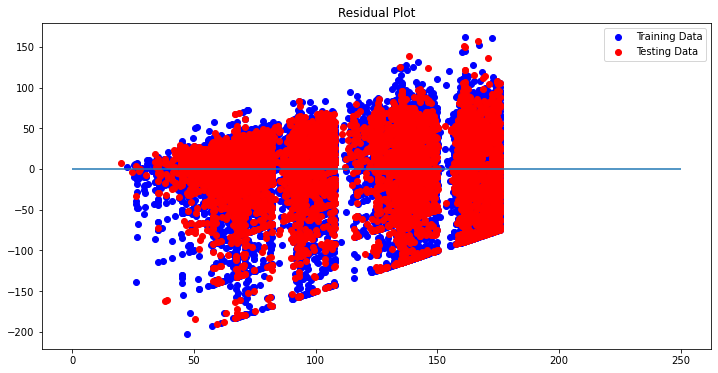

In [10]:
# Making predictions
predictions = model.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [11]:
fig.savefig('Graphs/LinearRegression')

In [14]:
# Calculating the mse and the r2 value for testing data
from sklearn.metrics import mean_squared_error, r2_score

# Scoring the predictions with mse and r2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1695.2069813032003
R-squared (R2 ): 0.48048851750965194
